/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


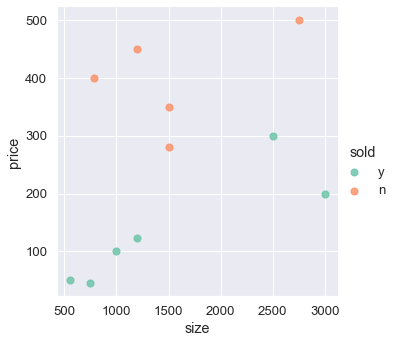

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
data = pd.read_csv('house_sizes_prices_svm.csv')
sns.lmplot('size', 'price',
    data=data,
    hue='sold',
    palette='Set2',
    fit_reg=False,
    scatter_kws={"s": 50});

## Figure 8.29 Above

In [2]:
X = data[['size','price']].values
y = np.where(data['sold']=='y', 1, 0) #--1 for Y and 0 for N---
model = svm.SVC(kernel='linear').fit(X, y)

Text(0.5, 1.0, 'Size of Houses and Their Asking Prices')

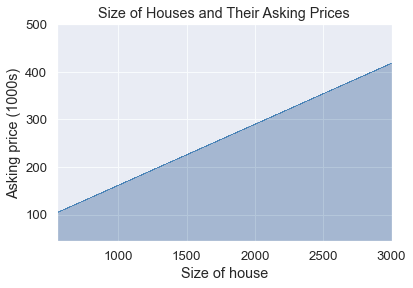

In [3]:
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
         
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
         
#---step size in the mesh---
h = (x_max / x_min) / 20
         
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
         
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
         
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
         
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Size of house')
plt.ylabel('Asking price (1000s)')
plt.title("Size of Houses and Their Asking Prices")

## Figure 8.30 Above

In [4]:
def will_it_sell(size, price):
    if(model.predict([[size, price]]))==0:
          print('Will not sell!')
    else:
          print('Will sell!')
  
#---do some prediction---
will_it_sell(2500, 400)  # Will not sell!
will_it_sell(2500, 200)  # Will sell!


Will not sell!
Will sell!


## Project 3 Predictions:

## Prediction for (1750, 386) below:

In [6]:
will_it_sell(1750, 386)  # Will not sell!

Will not sell!


## Prediction for (2800, 480) below:

In [7]:
will_it_sell(2800, 480)  # Will not sell!

Will not sell!
